# House Price Analytics

## 03 Data analysis for generating insights for buyers 

**Project:** Code Institute – Capstone Project

---
### **Objectives**
Analyze the housing market from a **Buyer's perspective** to identify value, affordability, and feature importance.

### **Inputs**
- `data/processed/final_house_data.csv`

### **Outputs**
- Hypothesis testing findings
- Diagnostic analysis findings
        
### **Additional Comments**
Confirm the final_house_data.csv is exisit under outputs/datasets. Run this notebook top-down.

---

### Setup the file and Load the Dataset
Import nesessary libraries

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pingouin as pg
from scipy import stats
import warnings 
# Ignore future warnings
warnings.simplefilter(action='ignore', category=FutureWarning) 

Set the home directory. Need to change the working directory from its current folder to its parent folder. Access the current directory with os.getcwd()

In [2]:
PROJECT_DIR = os.path.join(os.getcwd()) # Define the project root directory
os.chdir(PROJECT_DIR) # Change the current working directory to the project root
print("Working directory:", os.getcwd()) 

Working directory: c:\MyStuff\CodeInstitute\Projects\ci-project-02\Home-Value-Analysis\notebooks


Load the data from the original data set reside within data directory under data/processed/ directory. 

In [3]:
# LOAD DATASET
try:
    # Data directory paths
    data_path = os.path.join("..", "data", "processed")
    # Extract the original dataset
    df = pd.read_csv(os.path.join(data_path, "final_house_data.csv"))
    print("Dataset loaded successfully.")
except Exception as e:
    print(e)
    print("Error loading the dataset.")
    df = pd.DataFrame()  # Create an empty DataFrame if loading fails

print(f"Original dataset shape: {df.shape}")

Dataset loaded successfully.
Original dataset shape: (21596, 31)


Ensure Data Types (Critical Step)

In [4]:
# CSVs lose categorical metadata, so we re-cast them
categorical_cols = ['waterfront', 'view', 'condition', 'grade', 'zipcode', 'is_renovated']
for col in categorical_cols:
    df[col] = df[col].astype('category')

print("Data Types Set.")

Data Types Set.


---

### Affordability Analysis

USER STORY | Affordability: 
    As a Buyer,
    I want to identify the top 10 most affordable zip codes in King County,
So that I can filter my property search to areas that fit within my budget.

- Buyers need to know where they can afford to live. We analyze Price per Zip Code.
- We use **Median Price** because the price distribution is skewed (as found in NB1).

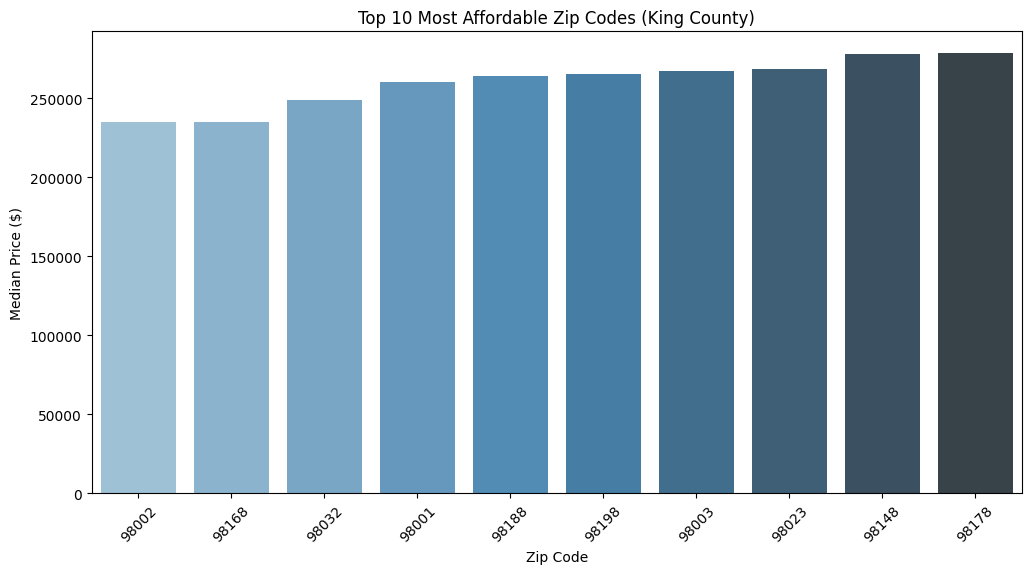

In [5]:
# Calculate Median Price per Zipcode
affordability = df.groupby('zipcode')['price'].median().sort_values().reset_index()

# Top 10 Most Affordable
top_10_affordable = affordability.head(10)

# Visualization with Seaborn - Automatic Aggregation
plt.figure(figsize=(12, 6))
sns.barplot(data=top_10_affordable, x='zipcode', y='price', palette='Blues_d', order=top_10_affordable['zipcode'])
plt.title('Top 10 Most Affordable Zip Codes (King County)')
plt.ylabel('Median Price ($)')
plt.xlabel('Zip Code')
plt.xticks(rotation=45)
plt.show()